<H1> Earthquakes in Central America (1965 - 2016)

<h2> Exploring the data

<h4> Importing data to watson studio

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5e257c6d7253436b8386d986dead5ac0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DKOtXM__d0h6An57FFBHSYN-eLWx4u-F8-ae86bpy5mW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5e257c6d7253436b8386d986dead5ac0.get_object(Bucket='earthquakesincentralamerica-donotdelete-pr-iatp1hrw6qx63l',Key='database.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_eq1 = pd.read_csv(body)
df_eq1.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


<h4> Creating a function for renaming based on the percentage an attribute has been repeated

In [2]:
def renaming_per_percentage(df,column,percentage):
    # Finding the percentages a word has been repeated in that column
    df_per = df[column].value_counts()/df[column].shape[0]
    percentage = percentage/100
    df_per = pd.DataFrame(df_per[df_per < (percentage)]).reset_index()
    
    # Creating a list of attributes under the prescribed percentage
    index = df_per['index'].to_list()
    
    # List of equal length of that in the previous code line
    other = ['other']*len(index)
    
    # Renaming
    df[column].replace(to_replace = index, value = other, inplace = True)
    
    #Display of the results for analysis purposes
    count = pd.DataFrame()
    per = pd.DataFrame()
    count['Att. Count'] = df[column].value_counts()
    per['Att. Percentage'] = round((df[column].value_counts()/df[column].shape[0])*100,2)
    results = pd.concat([count,per],axis = 1, join ='outer')
    
    return results

In [3]:
df_eq1.shape

(23412, 21)

In [4]:
df_eq1.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


<h4> Looking for missing or NAN values in the DF

In [5]:
df_eq1.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

<h2> Selecting only earthquakes in Central America

In [10]:
index_namesCA = df_eq1[(df_eq1['Latitude'] >= 7) & (df_eq1['Latitude'] <= 16.5) & (df_eq1['Longitude'] <= -80) & (df_eq1['Longitude'] >= -92 )].index 

In [11]:
index_namesCA.shape

(389,)

In [12]:
df_CA1 = df_eq1.loc[index_namesCA]

In [13]:
df_CA1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM856602,ISCGEM,ISCGEM,ISCGEM,Automatic
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,NaN,NaN,6.3,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM851774,ISCGEM,ISCGEM,ISCGEM,Automatic
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM849641,ISCGEM,ISCGEM,ISCGEM,Automatic
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM848237,ISCGEM,ISCGEM,ISCGEM,Automatic
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM844633,ISCGEM,ISCGEM,ISCGEM,Automatic


<h4> Plotting Histogram of counts vs magnitude

In [14]:
CA_magcount = df_CA1['Magnitude'].values

(array([196.,  65.,  45.,  29.,  21.,  17.,   5.,   2.,   4.,   5.]),
 array([5.5 , 5.72, 5.94, 6.16, 6.38, 6.6 , 6.82, 7.04, 7.26, 7.48, 7.7 ]),
 <a list of 10 Patch objects>)

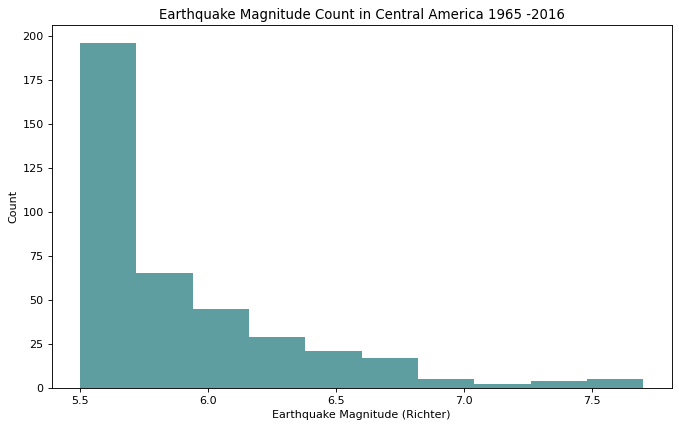

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Earthquake Magnitude Count in Central America 1965 -2016')
plt.xlabel('Earthquake Magnitude (Richter)')
plt.ylabel('Count')

plt.hist(CA_magcount, bins=10, color='cadetblue')

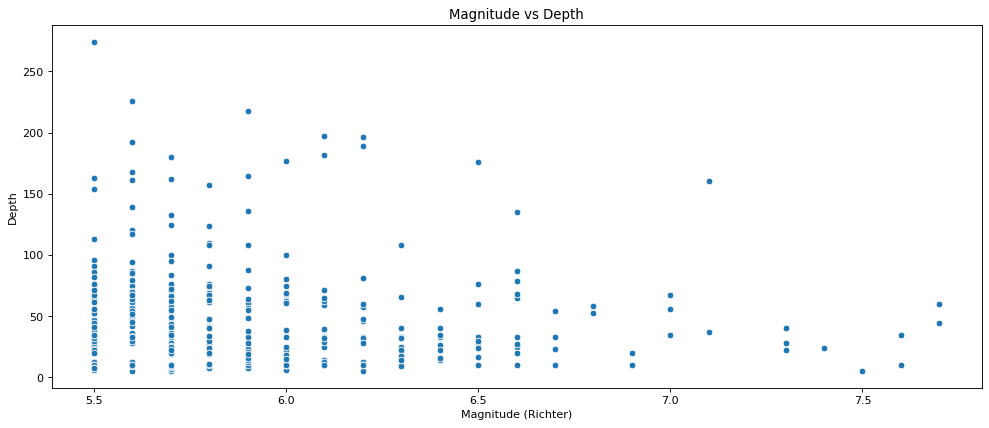

In [18]:
import seaborn as sns

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Depth')

sns.scatterplot(df_CA1['Magnitude'].values, df_CA1['Depth'].values, palette='PuBuGn_d')

<h3> Top earthquakes in Central America

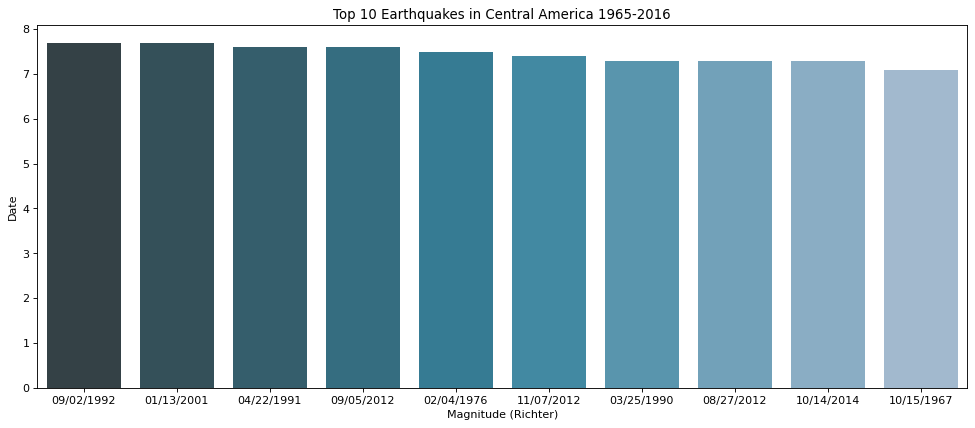

In [19]:


CA_top10 = df_CA1.nlargest(10, 'Magnitude')
y= CA_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 10 Earthquakes in Central America 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(CA_top10['Date'].values, CA_top10['Magnitude'].values, palette='PuBuGn_d')



In [20]:
df_CA1['year'] = pd.DatetimeIndex(df_CA1['Date']).year


In [21]:
df_CA1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM856602,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,NaN,NaN,6.3,MW,...,NaN,NaN,NaN,NaN,ISCGEM851774,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM849641,ISCGEM,ISCGEM,ISCGEM,Automatic,1966
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM848237,ISCGEM,ISCGEM,ISCGEM,Automatic,1966
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM844633,ISCGEM,ISCGEM,ISCGEM,Automatic,1966


<h2> Analysis per Decade

<h3> 1965-1974

In [22]:
CA_60sindex = df_CA1[(df_CA1['year'] >= 1965) & (df_CA1['year'] <= 1974)].index 

CA_60stop = df_CA1.loc[CA_60sindex]

In [23]:
CA_60stop.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM856602,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,NaN,NaN,6.3,MW,...,NaN,NaN,NaN,NaN,ISCGEM851774,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM849641,ISCGEM,ISCGEM,ISCGEM,Automatic,1966
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM848237,ISCGEM,ISCGEM,ISCGEM,Automatic,1966
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM844633,ISCGEM,ISCGEM,ISCGEM,Automatic,1966


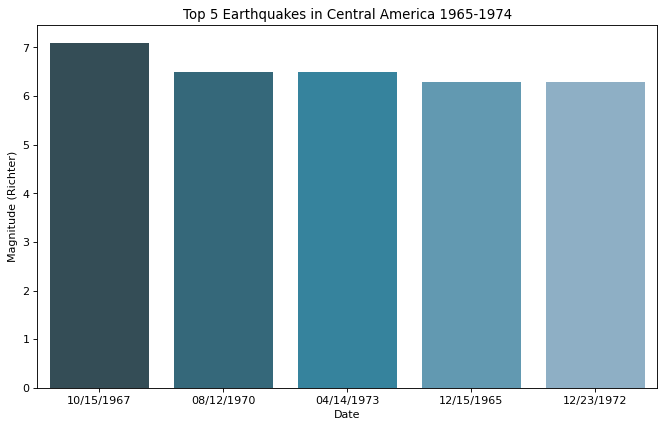

In [24]:
CA_60sindex = df_CA1[(df_CA1['year'] >= 1965) & (df_CA1['year'] <= 1974)].index  #creating list of index of the range of date we need

CA_60stop5 = df_CA1.loc[CA_60sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1965-1974')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(x=CA_60stop5['Date'].values, y=CA_60stop5['Magnitude'].values, palette='PuBuGn_d')



<h3> 1975 - 1984

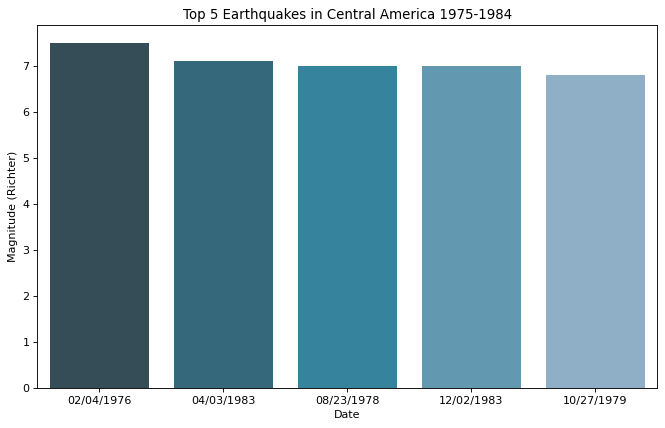

In [25]:
CA_70sindex = df_CA1[(df_CA1['year'] >= 1975) & (df_CA1['year'] <= 1984)].index  #creating list of index of the range of date we need

CA_70stop5 = df_CA1.loc[CA_70sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


y70s= CA_70stop5['Magnitude'].values

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1975-1984')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_70stop5['Date'].values, CA_70stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 1985 - 1994

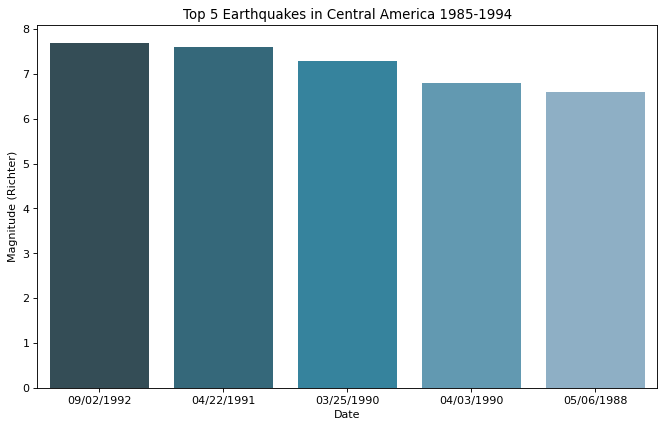

In [26]:
CA_80sindex = df_CA1[(df_CA1['year'] >= 1985) & (df_CA1['year'] <= 1994)].index  #creating list of index of the range of date we need

CA_80stop5 = df_CA1.loc[CA_80sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1985-1994')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_80stop5['Date'].values, CA_80stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 1995 - 2004

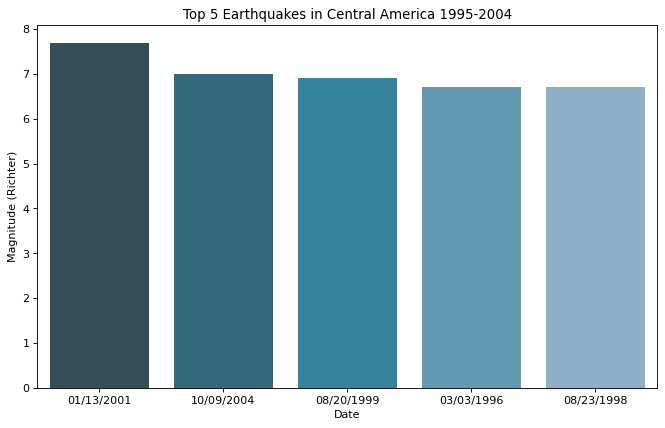

In [27]:
CA_90sindex = df_CA1[(df_CA1['year'] >= 1995) & (df_CA1['year'] <= 2004)].index  #creating list of index of the range of date we need

CA_90stop5 = df_CA1.loc[CA_90sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1995-2004')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_90stop5['Date'].values, CA_90stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 2005 - 2016

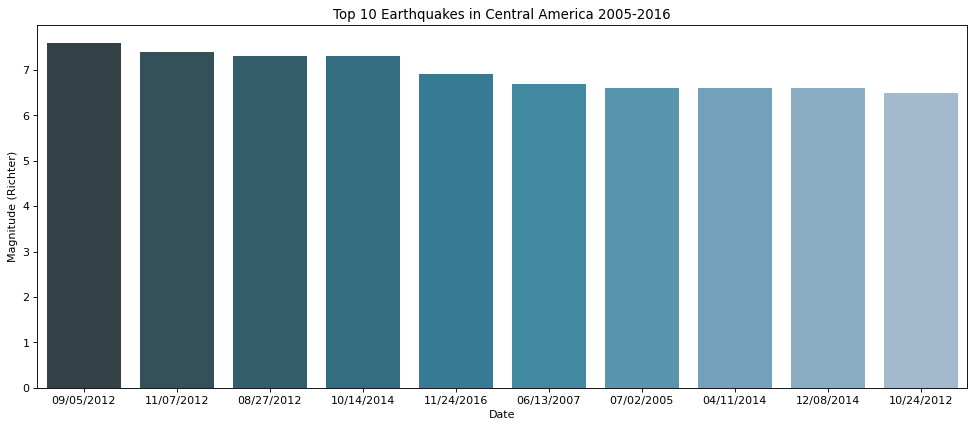

In [28]:
CA_00sindex = df_CA1[(df_CA1['year'] >= 2005) & (df_CA1['year'] <= 2016)].index  #creating list of index of the range of date we need

CA_00stop5 = df_CA1.loc[CA_00sindex].nlargest(10, 'Magnitude') #loc the rows that have the top 10 in magnitude


figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k') 

plt.title('Top 10 Earthquakes in Central America 2005-2016')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_00stop5['Date'].values, CA_00stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> Install Folium

In [29]:
!pip install folium

     |████████████████████████████████| 94 kB 6.5 MB/s  eta 0:00:01


<h3> Plotting all rows on a map, with center in Central America

In [30]:
import folium

locationsCA = df_CA1[['Latitude', 'Longitude']]
locationlistCA = locationsCA.values.tolist()
len(locationlistCA)
locationlistCA[7]

CAmap = folium.Map(location=[12.27, -85.33], zoom_start=6)
for point in range(0, len(locationlistCA)):
    folium.Marker(locationlistCA[point], popup=df_eq1['Magnitude'][point]).add_to(CAmap)

In [31]:
CAmap

<h4> Creating a Heatmap

In [32]:
from folium import plugins
from folium.plugins import HeatMap

locationsCA = df_CA1[['Latitude', 'Longitude']]
locationlistCA = locationsCA.values.tolist()
len(locationlistCA)
locationlistCA[7]

CAheatmap = folium.Map(location=[12.27, -85.33], zoom_start=6)
for point in range(0, len(locationlistCA)):
    HeatMap(locationlistCA).add_to(CAheatmap)

<h2> Analysis by country

<h3> Guatemala

In [33]:
index_namesGUA = df_CA1[(df_CA1['Latitude'] >= 13.4) & (df_CA1['Latitude'] <= 16) & (df_CA1['Longitude'] <= -90) & (df_CA1['Longitude'] >= -92.5)].index 

df_GUA = df_CA1.loc[index_namesGUA]

In [34]:
df_GUA.shape

(87, 22)

<H4> Earthquakes Epicenter locations in Guatemala

In [35]:
locationsGUA = df_GUA[['Latitude', 'Longitude']]
locationlistGUA = locationsGUA.values.tolist()
len(locationlistGUA)
locationlistGUA[7]

map_GUA = folium.Map(location=[14.62, -91.09], zoom_start=8)
for point in range(0, len(locationlistGUA)):
    folium.Marker(locationlistGUA[point], popup=df_eq1['Magnitude'][point]).add_to(map_GUA)

In [36]:
map_GUA

<h4> Heatmap of Earthquake locations in Guatemala

In [39]:
heatmap_GUA = folium.Map(location=[14.62, -91.09], zoom_start=8)
for point in range(0, len(locationlistGUA)):
    HeatMap(locationlistGUA).add_to(heatmap_GUA)

In [40]:
heatmap_GUA

<h4> Top 5 Earthquakes in Guatemala (1965 - 2016)

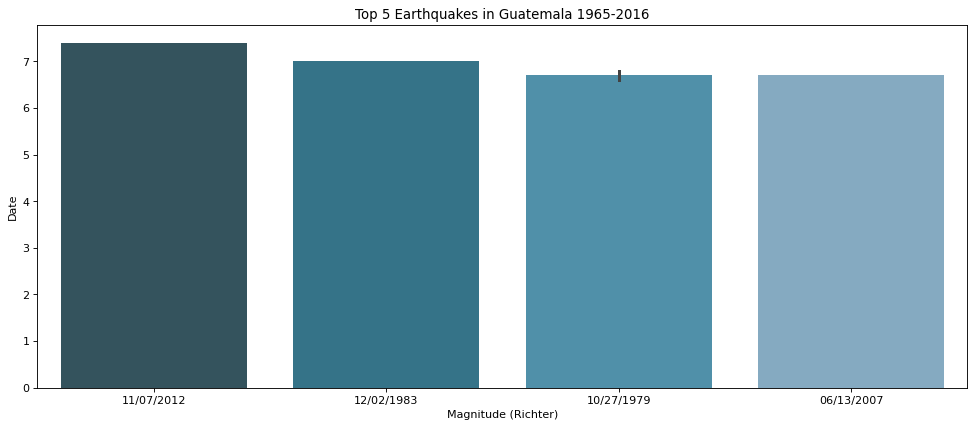

In [41]:
GUA_top10 = df_GUA.nlargest(5, 'Magnitude')
y= GUA_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Guatemala 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(GUA_top10['Date'].values, GUA_top10['Magnitude'].values, palette='PuBuGn_d')

<h3> El Salvador

In [42]:
index_namesSV = df_CA1[(df_CA1['Latitude'] >= 12.4) & (df_CA1['Latitude'] <= 14) & (df_CA1['Longitude'] <= -88.59) & (df_CA1['Longitude'] >= -90.3)].index 

df_SV = df_CA1.loc[index_namesSV]

In [43]:
df_SV.shape

(54, 22)

<H4> Earthquakes Epicenter locations in El Salvador

In [44]:
locationsSV = df_SV[['Latitude', 'Longitude']]
locationlistSV = locationsSV.values.tolist()
len(locationlistSV)
locationlistSV[7]

map_SV = folium.Map(location=[13.6, -88.9], zoom_start=8)
for point in range(0, len(locationlistSV)):
    folium.Marker(locationlistSV[point], popup=df_eq1['Magnitude'][point]).add_to(map_SV)

In [45]:
map_SV

<h4> Heatmap of Earthquake locations in El Salvador

In [46]:
heatmap_SV = folium.Map(location=[13.6, -88.9], zoom_start=8)
for point in range(0, len(locationlistSV)):
    HeatMap(locationlistSV).add_to(heatmap_SV)

In [47]:
heatmap_SV

<h4> Top 5 Earthquakes in El Salvador 1965 - 2016

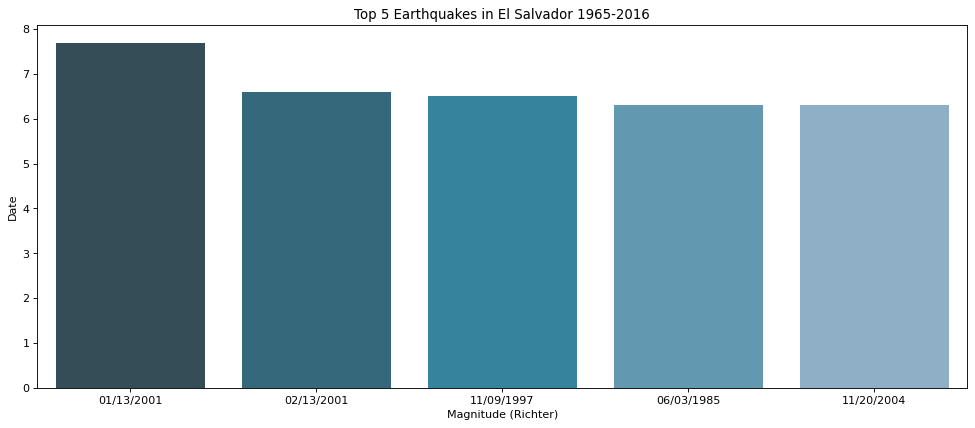

In [48]:
SV_top10 = df_SV.nlargest(5, 'Magnitude')
y= SV_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in El Salvador 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(SV_top10['Date'].values, SV_top10['Magnitude'].values, palette='PuBuGn_d')

<H3> Nicaragua

In [49]:
index_namesNI = df_CA1[(df_CA1['Latitude'] >= 10.93) & (df_CA1['Latitude'] <= 13) & (df_CA1['Longitude'] <= -85.50) & (df_CA1['Longitude'] >= -87.9)].index 

df_NI = df_CA1.loc[index_namesNI]

In [50]:
df_NI.shape

(97, 22)

<H4> Earthquakes Epicenter locations in Nicaragua

In [51]:
locationsNI = df_NI[['Latitude', 'Longitude']]
locationlistNI = locationsNI.values.tolist()
len(locationlistNI)
locationlistNI[7]

map_NI = folium.Map(location=[12, -86.4], zoom_start=8)
for point in range(0, len(locationlistNI)):
    folium.Marker(locationlistNI[point], popup=df_eq1['Magnitude'][point]).add_to(map_NI)

In [52]:
map_NI

<h4> Heatmap of Earthquake locations in Nicaragua

In [53]:
heatmap_NI = folium.Map(location=[12, -86.4], zoom_start=8)
for point in range(0, len(locationlistNI)):
    HeatMap(locationlistNI).add_to(heatmap_NI)

In [54]:
heatmap_NI

<h4> Top 5 Earthquakes in Nicaragua (1965 - 2016)

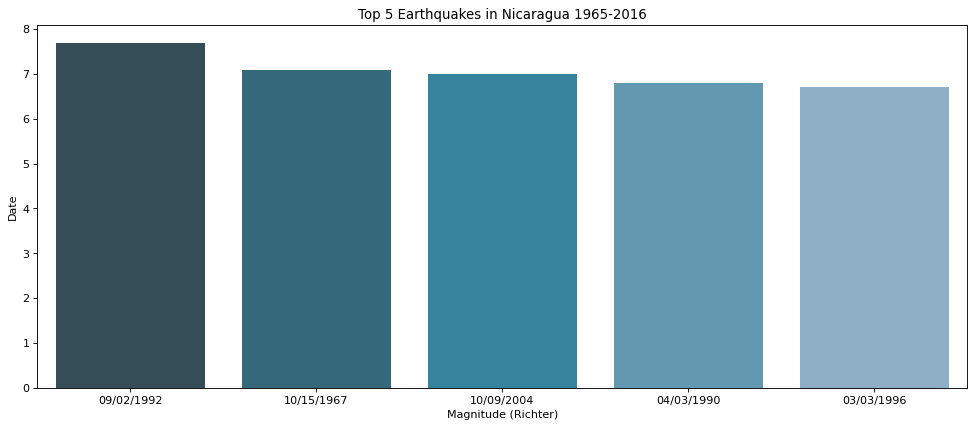

In [55]:
NI_top10 = df_NI.nlargest(5, 'Magnitude')
y= NI_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Nicaragua 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(NI_top10['Date'].values, NI_top10['Magnitude'].values, palette='PuBuGn_d')

<H3> Costa Rica

In [56]:
index_namesCR = df_CA1[(df_CA1['Latitude'] >= 7.84) & (df_CA1['Latitude'] <= 11) & (df_CA1['Longitude'] <= -82.90) & (df_CA1['Longitude'] >= -87)].index 

df_CR = df_CA1.loc[index_namesCR]

In [57]:
df_CR.shape

(71, 22)

<H4> Earthquakes Epicenter locations in Costa Rica

In [64]:
locationsCR = df_CR[['Latitude', 'Longitude']]
locationlistCR = locationsCR.values.tolist()
len(locationlistCR)
locationlistCR[7]

map_CR = folium.Map(location=[9.93, -84.4], zoom_start=8)
for point in range(0, len(locationlistCR)):
    folium.Marker(locationlistCR[point], popup=df_eq1['Magnitude'][point]).add_to(map_CR)

In [65]:
map_CR

<h4> Heatmap of Earthquake locations in Costa Rica

In [66]:
heatmap_CR = folium.Map(location=[9.93, -84.4], zoom_start=8)
for point in range(0, len(locationlistCR)):
    HeatMap(locationlistCR).add_to(heatmap_CR)

In [67]:
heatmap_CR

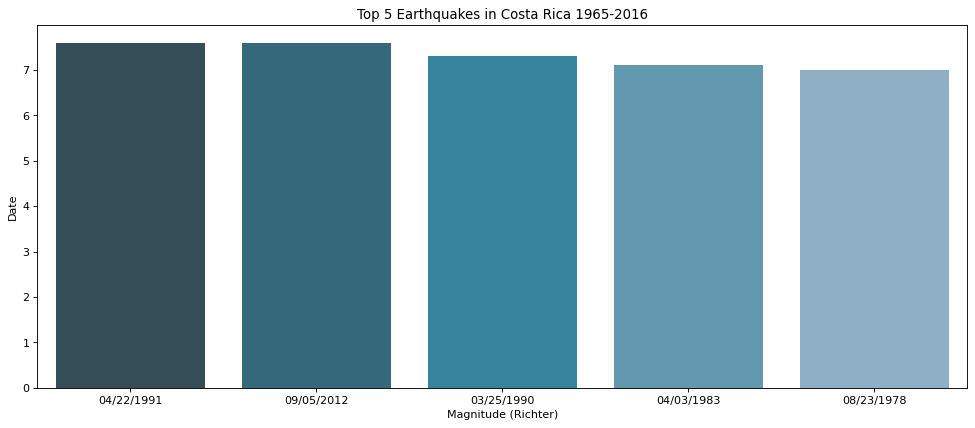

In [62]:
CR_top10 = df_CR.nlargest(5, 'Magnitude')
y= CR_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Costa Rica 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(CR_top10['Date'].values, CR_top10['Magnitude'].values, palette='PuBuGn_d')

I see a lot of potential here, we could work on a literature research and see what are the main points that people with domain expertise highlight and how the data we have crunched makes sense with that as well as crunching new numbers based on what other data the experts focus on.

<h4>Proposed next steps:</h4/>
<p>1- Work on a literature review
<p>2- Review calculations and make a logic analysis
<p>3- Perform additional calculations/visualization which might be missing out of what we conclude out of the literature review</p/>
<p>4- Add a potential prediction such as:</p/>
    <p>a. when and where will the next 7 or above Earthquake happen?<p/>
    <p>b. no clue, think about it<p/>
<p>5- Write the report</p/>

<h4>Notes:</h4/>
<p>a- to avoid loosing time we can reduce the data to our gap of interest (in this case CA) and start performing the data cleaning then.</p/>
b- create more tools of analysis which let us understand how we are modifying the data